# Statistics

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Gender

In [2]:
gender_pd = pd.read_json("../data/gender_counts.json", lines=True)

In [3]:
gender_pd = gender_pd.sort_values(by=['count'], ascending=False).reset_index(drop=True)
gender_pd

,gender,count
0,Q6581097,1155199
1,Q6581072,229603
2,Q1052281,281
3,Q2449503,117
4,Q179294,70
5,Q1097630,64
6,Q48270,59
7,Q189125,3
8,Q18116794,2
9,Q505371,2


* Q6581097 --> Male
* Q6581072 --> Female
* Q1052281 --> Transgender female
* Q2449503 --> Transgender male

In [4]:
print("In total there are {} different genders".format(len(gender_pd)))

In total there are 12 different genders


In [5]:
with open('../data/dict_genders.json') as json_file:
    line = json_file.readline()
    dict_genders = json.loads(line)

In [6]:
gender_pd['gender'] = gender_pd['gender'].map(lambda x: dict_genders.get(x, "other"))

In [7]:
gender_pd = gender_pd.groupby('gender').sum().reset_index()
gender_pd

,gender,count
0,female,229603
1,male,1155199
2,other,600


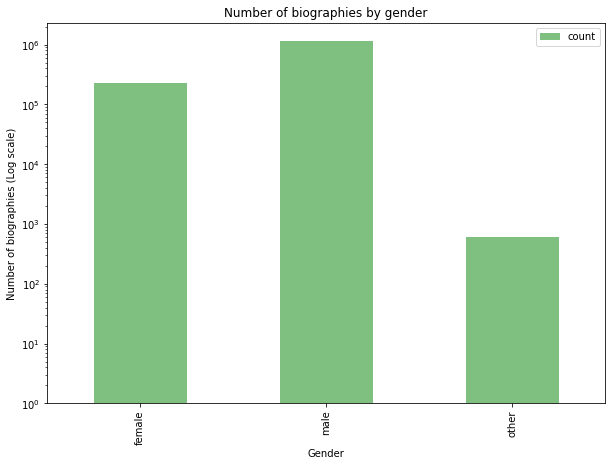

In [8]:
pl = gender_pd.plot(kind="bar", x="gender", y="count", figsize=(10, 7), log=True, alpha=0.5, color="green")
pl.set_xlabel("Gender")
pl.set_ylabel("Number of biographies (Log scale)")
pl.set_title("Number of biographies by gender");

In [9]:
n_total = gender_pd['count'].sum()
n_male = gender_pd[gender_pd['gender'] == 'male']['count'].values[0]
n_female = gender_pd[gender_pd['gender'] == 'female']['count'].values[0]
n_other = n_total - n_male - n_female

print("{:.2f}% of the entries are male".format(n_male/n_total*100))
print("{:.2f} % of the entries are female".format(n_female/n_total*100))
print("{:.2f} % of the entries are other gender".format(n_other/n_total*100))

83.38% of the entries are male
16.57 % of the entries are female
0.04 % of the entries are other gender


Based on these numbers, we decide to **drop the other genders** and continue our analysis with only female and male.

## Occupation

In [10]:
occ_pd = pd.read_json("../data/occupation_counts.json", lines=True)

In [11]:
occ_pd = occ_pd.sort_values(by=['count'], ascending=False).reset_index(drop=True)
occ_pd.head()

,occupation,count
0,Q82955,190740
1,Q937857,143768
2,Q33999,75106
3,Q36180,74307
4,Q1930187,40662


In [12]:
print("In total there are {} different occupations".format(len(occ_pd)))

In total there are 5893 different occupations


### How do we deal with them?

In [13]:
dict_occupations = {}

with open('../data/dict_occupations.json') as json_file:
    content = json_file.readlines()
    for line in content:
        occ = json.loads(line)
        dict_occupations.update(occ)

In [14]:
occ_pd['occupation'] = occ_pd['occupation'].map(lambda x: dict_occupations.get(x, "other"))

In [15]:
occ_pd.head()

,occupation,count
0,politician,190740
1,association football player,143768
2,actor,75106
3,writer,74307
4,journalist,40662


In [16]:
n_total = occ_pd['count'].sum()
n_first_100 = occ_pd.iloc[:100]['count'].sum()

print("The 100 most common occupations represent {:.2f}% of the all the biographies".format(n_first_100/n_total*100))

The 100 most common occupations represent 78.58% of the all the biographies


In [17]:
n_101 = occ_pd.iloc[101]['count'].sum()

print("The 101 most common occupation represent {:.2f}% of the all the biographies".format(n_101/n_total*100))

The 101 most common occupation represent 0.16% of the all the biographies


Therefore, we decide to **keep only the first 100 occupations**. The other occupations represent less than 1% of the biographies, so we think they are not worth it to be analyzed in detail.

For the firs 100 occupations, we will group them in more general fields (e.g. screenwriter and film director will be grouped into the same category named cinema).

In [18]:
occ_filtered_pd = occ_pd.iloc[:100].copy()

In [19]:
occ_filtered_pd

,occupation,count
0,politician,190740
1,association football player,143768
2,actor,75106
3,writer,74307
4,journalist,40662
...,...,...
95,illustrator,3634
96,comedian,3593
97,golfer,3571
98,figure skater,3341


In [20]:
with open('../data/dict_categories_occupations.json') as json_file:
    line = json_file.readline()
    dict_cat_occ = json.loads(line)

In [21]:
occ_filtered_pd.loc[:, 'field'] = occ_filtered_pd['occupation'].map(lambda x: dict_cat_occ.get(x))

In [22]:
occ_filtered_pd.head()

,occupation,count,field
0,politician,190740,Politics
1,association football player,143768,Sports
2,actor,75106,Artist
3,writer,74307,Artist
4,journalist,40662,Social Sciences


In [23]:
occupation_counts = occ_filtered_pd.groupby(['field']).sum().reset_index()
occupation_counts

,field,count
0,Artist,615408
1,Business & Law,96291
2,Education,43733
3,Military,35575
4,Model,10825
5,Politics,216462
6,Religion,28410
7,Scientist,82334
8,Social Sciences,87686
9,Sports,412974


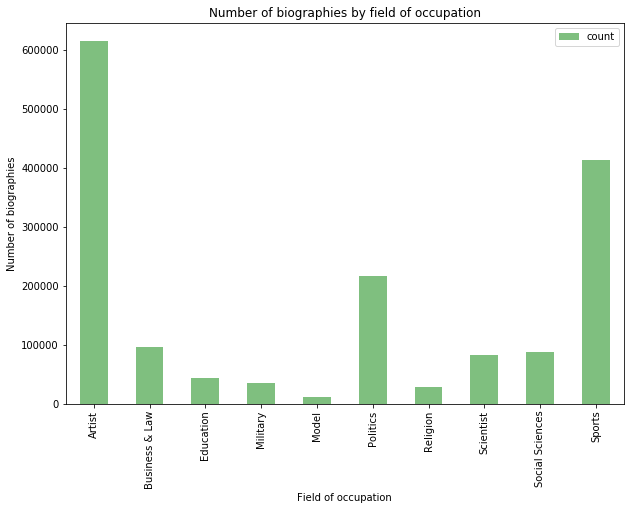

In [24]:
pl = occupation_counts.plot(kind="bar", x="field", y="count", figsize=(10, 7), log=False, alpha=0.5, color="green")
pl.set_xlabel("Field of occupation")
pl.set_ylabel("Number of biographies")
pl.set_title("Number of biographies by field of occupation");

In [25]:
n_total = occupation_counts['count'].sum()
n_artist = occupation_counts[occupation_counts['field'] == 'Artist']['count'].values[0]
n_sports = occupation_counts[occupation_counts['field'] == 'Sports']['count'].values[0]
n_politics = occupation_counts[occupation_counts['field'] == 'Politics']['count'].values[0]

print("{:.2f}% of the entries work in the artistic field".format(n_artist/n_total*100))
print("{:.2f} % of the entries work in the sports field".format(n_sports/n_total*100))
print("{:.2f} % of the entries work in the politics field".format(n_politics/n_total*100))

37.76% of the entries work in the artistic field
25.34 % of the entries work in the sports field
13.28 % of the entries work in the politics field
